### 线性回归中使用梯度下降法

线性回归中,为了是模型更好,需要使损失函数尽可能下

在之前的学习中,求出系数和截距值即可

本案例中,线性回归中使用梯度下降法来求解系数和截距  

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 构造数据
np.random.seed(100)  # 设定随机种子,方便多次测试
x = 2* np.random.random(size=100)
y = x*3. + 4 + np.random.normal(size=100)

X = x.reshape(-1, 1)
print('X.shape:',X.shape)
print('y.shape:',y.shape)

X.shape: (100, 1)
y.shape: (100,)


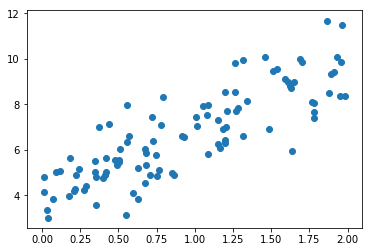

In [3]:
# 绘制图像
plt.scatter(x, y)
plt.show()

线性回归中损失函数公式:

[均方误差公式](img/均方误差MSE.png)

In [4]:
# 定义损失函数

def J(theta, X_b, y):
    """
        损失函数定义
    :theta 求导变量,关于theta求导
    :X_b 数据集X新增一列,且值都为1的新矩阵
    :y   数据集y
    :return 损失函数,如值太大无法表示,则返回 float的最大值
    """
    try:
        return np.sum((y - X_b.dot(theta)) ** 2) / len(X_b)
    except:
        return float('inf')
    

损失函数求导公式

[损失函数求导公式](img/线性回归使用梯度下降法.png)

In [5]:
# 定义损失函数求导函数
def dJ(theta, X_b, y):
    """
        损失函数求导函数定义
    :theta 求导变量,关于theta求导
    :X_b 数据集X新增一列,且值都为1的新矩阵
    :y   数据集y
    :return 损失函数求导函数
    """
    result = np.empty(len(theta))  # 构建大小为len(theta)的空列表
    result[0] = np.sum(X_b.dot(theta) - y)  # 先处理theta_0的导数
    
    # 对之后的所有theta进行求导,除了第一列theta_0
    for i in range(1, len(theta)):
        result[i] = (X_b.dot(theta) - y).dot(X_b[:, i])
        
    return 2 * result / len(X_b)

In [6]:
# 定义梯度下降函数
def gradient_descent(X_b, y, initial_theta, i_iter=1e4, eta=0.01, epsilon=1e-8):
    """
        梯度下降函数定义
    :X_b 数据集X新增一列,且值都为1的新矩阵
    :y   数据集y
    :initial_theta   初始theta
    :i_iter   迭代次数
    :eta   学习率(步长),默认0.01
    :epsilon   无限接近0的数
    :return theta值
    """
    theta = initial_theta
    count = 0
    while count < i_iter:
        gradient = dJ(theta, X_b, y)
        last_theta = theta
        theta = theta - eta * gradient  # 不能写为theta -= eta * gradient
        if abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon:
            break
        count += 1
    
    return theta

### 不能写为theta -= eta * gradient的原因
因为 theta = theta - eta * gradient，每次 theta - eta * gradient 产生了一个新的 np.array 的对象，赋给 theta，也就是让 theta 指向了一个全新的向量；

但是，theta -= eta * gradient 只是修改当前 theta 指向的向量的内存。


因为前面有一句 last_theta = theta，这将直接也修改 last_theta 的值。

如果想使用 theta -= eta * gradient，就要让 last_theta 和 theta 的指向不一致。方法是，可以把 last_theta = theta 这一句改成：last_theta = np.array(theta)。

即根据 theta 的值，创建一个新的 np.array，赋给 last_theta。

**另外**,只有可变类型存在这种问题,不可变类型不存在,普通常量赋值使用 '-=' 操作没有任何问题

其实,在Python中一切皆对象,theta就是np.array对象,可变类型

In [11]:
# 验证-=操作符
lst1 = np.array([1, 2, 3, 4])
print('未做任何修改的lst1地址', id(lst1))
lst2 = np.array([2, 3, 4, 5])

lst1 -= lst1 - lst2  # 地址未变,还是刚开始定义lst1的地址
print('lst1 -= lst1 - lst2修改的lst1地址', id(lst1))  

lst1 = lst1 - lst2  # 地址变了,lst1指向了一个全新的地址
print('lst1 = lst1 - lst2修改的lst1地址', id(lst1))



未做任何修改的lst1地址 1931448418016
lst1 -= lst1 - lst2修改的lst1地址 1931448418016
lst1 = lst1 - lst2修改的lst1地址 1931451776816


# 验证 测试


In [7]:
# 构造X_b数据集, 在X第一列新增值都为1的列
X_b = np.hstack((np.ones((len(X),1)), X))
X_b[:10]

array([[1.        , 1.08680988],
       [1.        , 0.55673877],
       [1.        , 0.84903518],
       [1.        , 1.68955226],
       [1.        , 0.00943771],
       [1.        , 0.24313824],
       [1.        , 1.34149817],
       [1.        , 1.65170551],
       [1.        , 0.27341318],
       [1.        , 1.15018666]])

In [8]:
# 构造theta初始值, 假设从0开始  
# X_b.shape[1] 是保证每个x都有系数theta
initial_theta = np.zeros(X_b.shape[1])
initial_theta

array([0., 0.])

In [9]:
# 使用梯度下降法计算theta值
theta = gradient_descent(X_b, y, initial_theta)
theta

array([3.98255707, 2.86436851])

使用自己封装的梯度下降法来训练线性回归模型

In [22]:
from LinearRegression import LinearRegression


estimator = LinearRegression()

estimator.fit_gd(X, y)

LinearRegression()

In [23]:
# 查看截距
estimator.intercept_

3.9825570701953943

In [24]:
# 查看系数
estimator.coef_


array([2.86436851])